<a href="https://colab.research.google.com/github/anupstar100/Seoul-Bike-Sharing-Demand-Prediction/blob/main/SML_Capstone_Project_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## **Loading dataset and having first view**

In [3]:
# MOUNTING THE GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# LOADING THE DATA
# SETTING ENCODING AS UNICODE_ESCAPE BECAUSE IT GIVES UTF-8 ENCODING ERROR

df = pd.read_csv(r'/content/drive/MyDrive/Capston Project/Bike Sharing Demand Prediction/SeoulBikeData.csv', encoding = 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## **Exploratory Data Analysis and Data Preprocessing**

In [6]:
# CHECKING THE SHAPE OF OUR DATASET

df.shape

(8760, 14)

**Observations:**
1. The data contains 8760 rows and 14 columns.
2. The dataset the data of one year on daily basis from 1/12/2017 to 30/11/2018 i.e., 365 days each hour.
  * 1 day = 24 hours and 1 year = 365 days. So, 1 year = 8,760 rows of data.

In [7]:
# CHECKING FOR NULL VALUES AS WELL AS DATATYPES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Observations:**
1. There are no null values.
2. There are 10 numerical columns and 4 categorical columns.
3. 'Date' column is of 'object' data type.

In [8]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

With this, we can say that there are no null values present in our dataset.

In [9]:
# CONVERTING THE DATA TYPE OF 'DATE' COLUMN FROM 'OBJECT' TO 'DATE'

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Date'][:6]

0   2017-12-01
1   2017-12-01
2   2017-12-01
3   2017-12-01
4   2017-12-01
5   2017-12-01
Name: Date, dtype: datetime64[ns]

In [10]:
# CHECKING FOR THE STATISTICAL VALUES

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**Observations:**
* There might be outliers in 'Visibility (10m)' and 'Solar Radiation (MJ/m2)' as the difference between their mean and median is large.

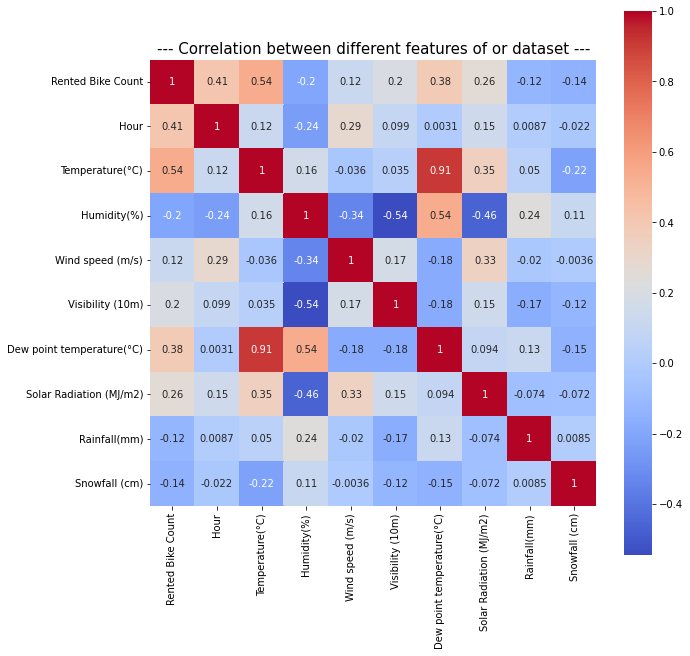

In [11]:
# CHECKING FOR CORRELATION

plt.figure(figsize = (10, 10))
plt.title('--- Correlation between different features of or dataset ---', size = 15)
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, square = True)

**Observation:**
1. We can see that with our targer variable (Rented Bike Count), the most correlated variables are:
    * Hour
    * Temperature
    * Dew point temperature
    * solar radiation

2. Dew point tempearture is highly correlated with our target variable. This can cause multicolinearity problem in future. So, we can drop it.

In [12]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# DROPPING THE COLUMN 'DEW POINT TEMPERATURE'

del df['Dew point temperature(°C)']

In [14]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [15]:
# LIST OF SORTED CORRELATION OF TVARIABLES TO THE TARGET

pd.DataFrame(df.corr().unstack().sort_values(ascending = False)['Rented Bike Count'], columns = ['Correlation with the target']).style.background_gradient(cmap = sns.light_palette("red", as_cmap=True))

,Correlation with the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


## **Data Processing and Data Visualization**